In [6]:
import json


with open("id_errors.json", "r") as jsonfile:
    udict = json.load(jsonfile)

/opt/conda/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


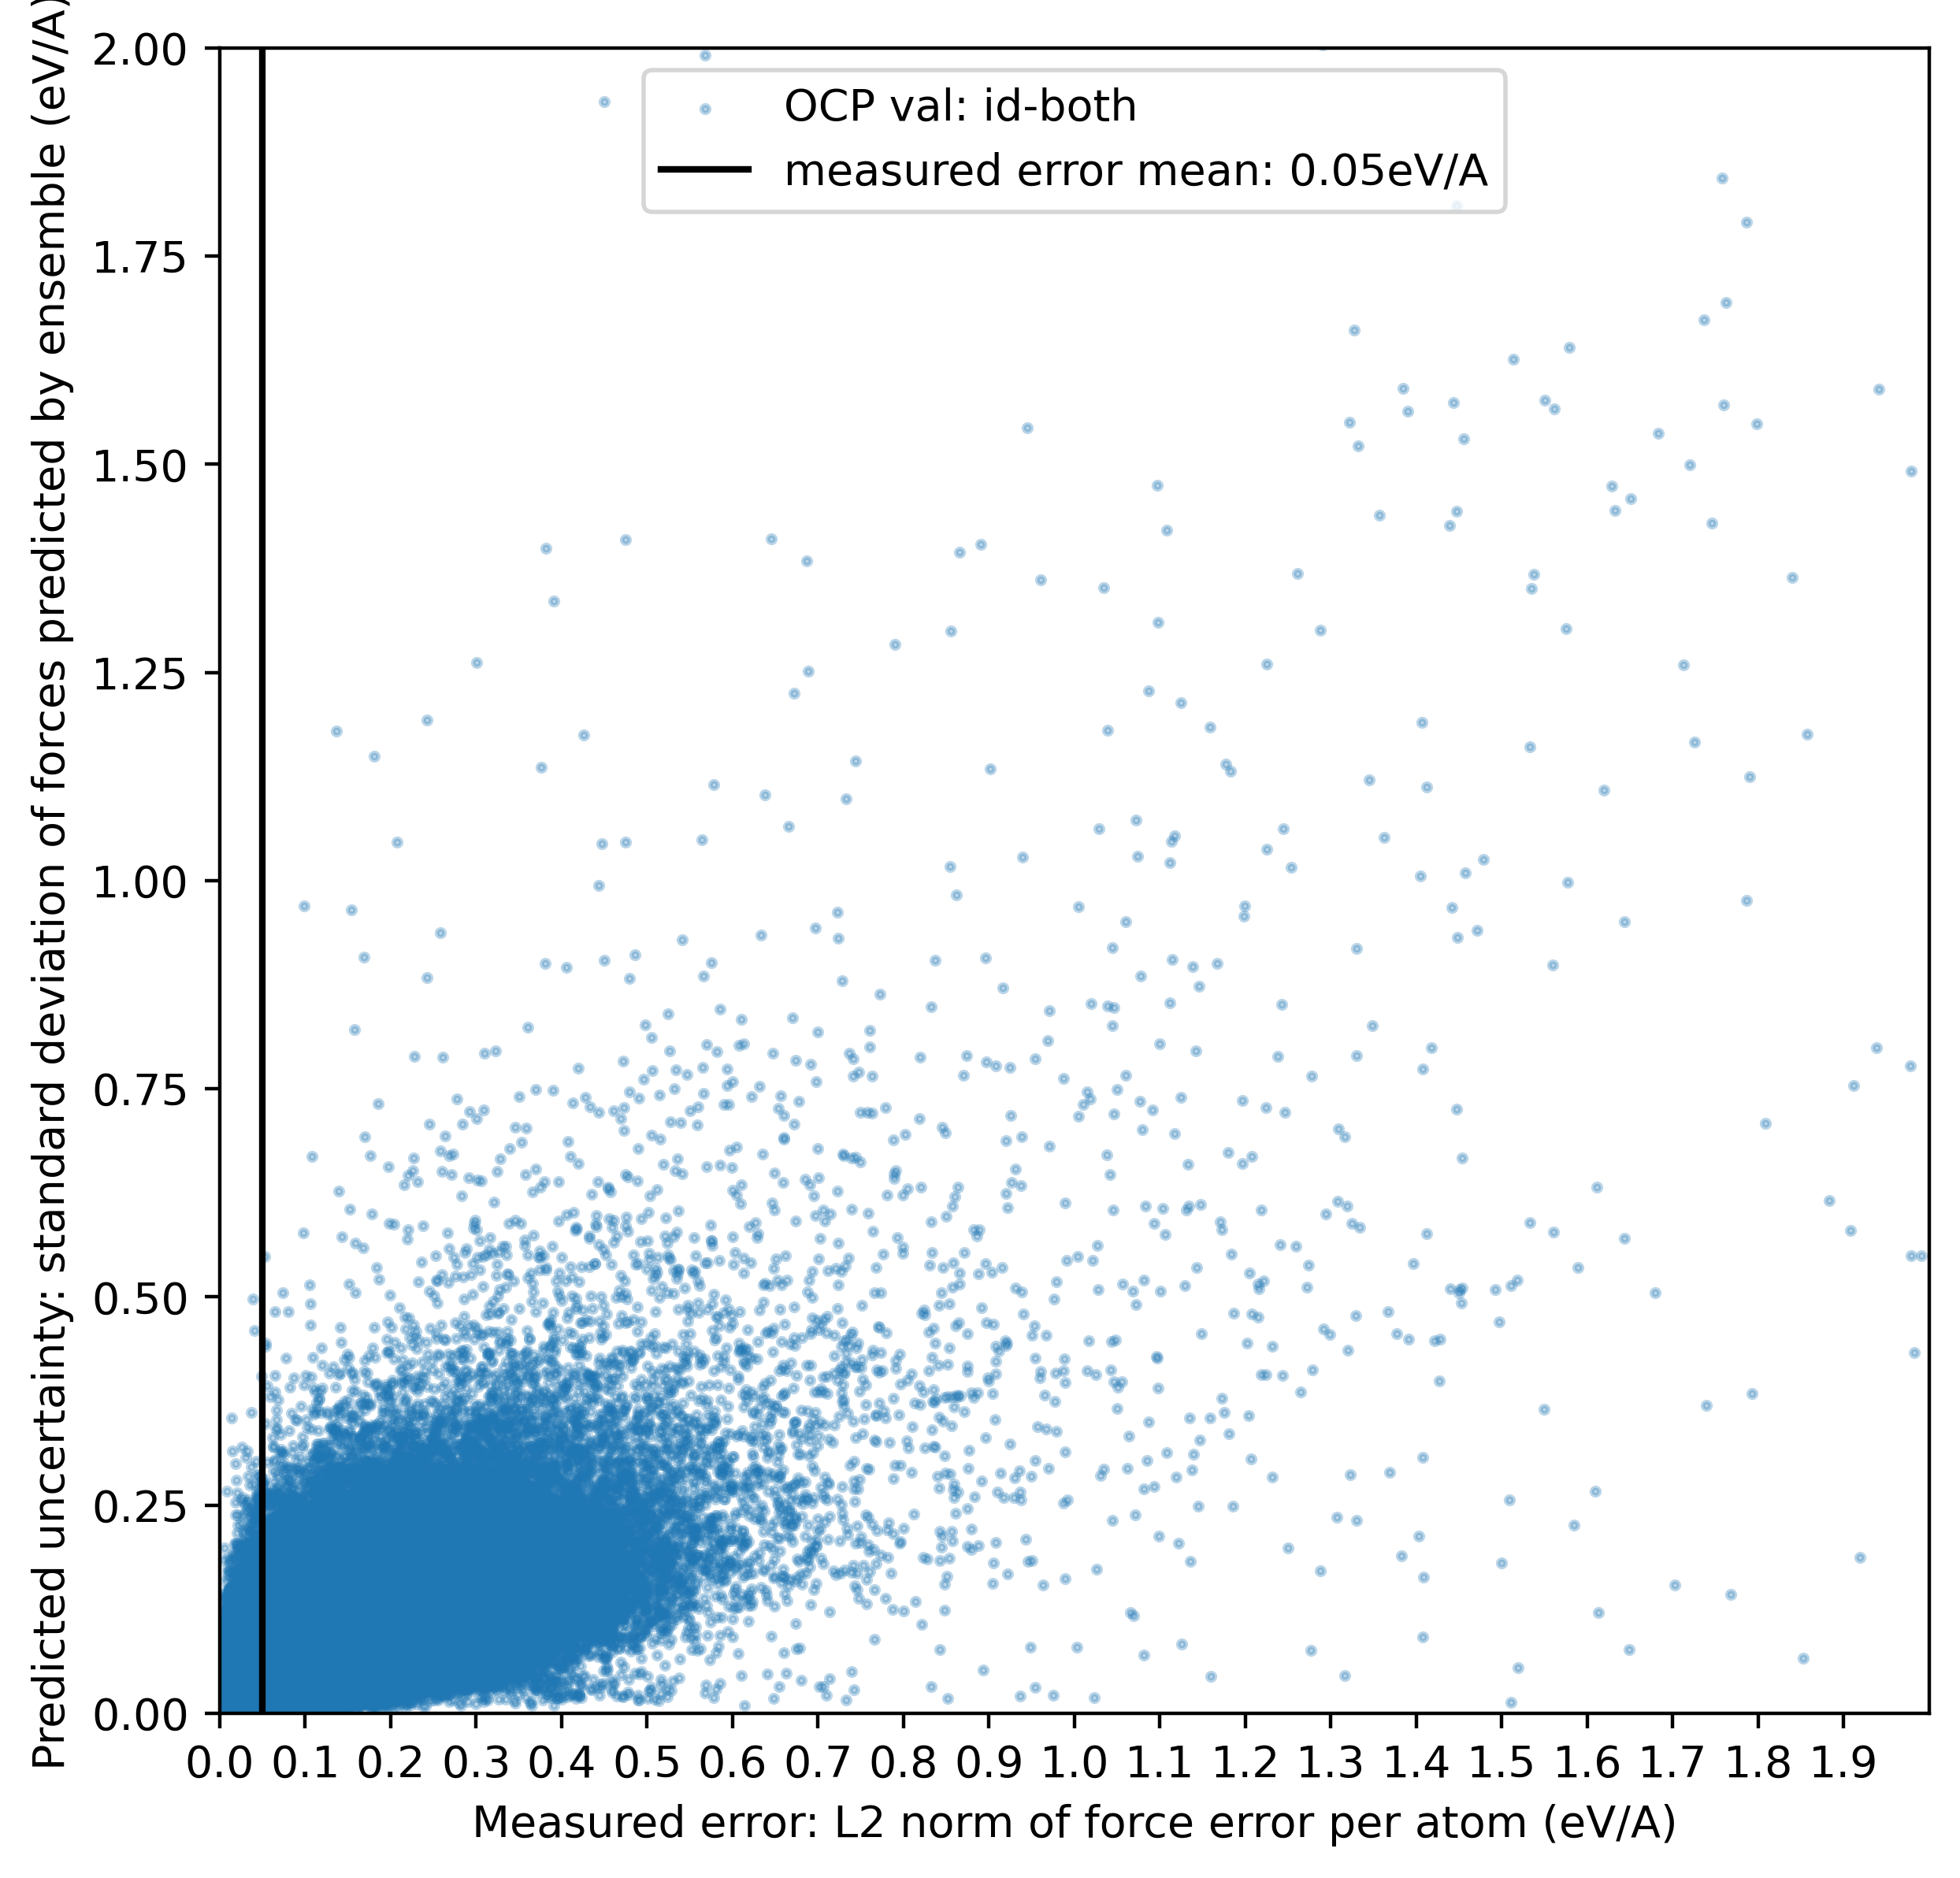

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7), dpi=400)
x = udict["en_error"]
y = udict["en_stdev"]
xmean = np.mean(x)

limits = (0, max(x + y))
limits = (0, 2)

plt.scatter(x, y, s=3, alpha=0.3, label="OCP val: id-both")
plt.plot((xmean, xmean), limits, "k-", label="measured error mean: " + str(round(xmean, 3)) + "eV/A")
plt.xlim(limits)
plt.ylim(limits)
plt.xticks(np.arange(0, 2, step=0.1))
plt.xlabel("Measured error: L2 norm of force error per atom (eV/A)")
plt.ylabel("Predicted uncertainty: standard deviation of forces predicted by ensemble (eV/A)")
plt.legend()

[1.3723957]


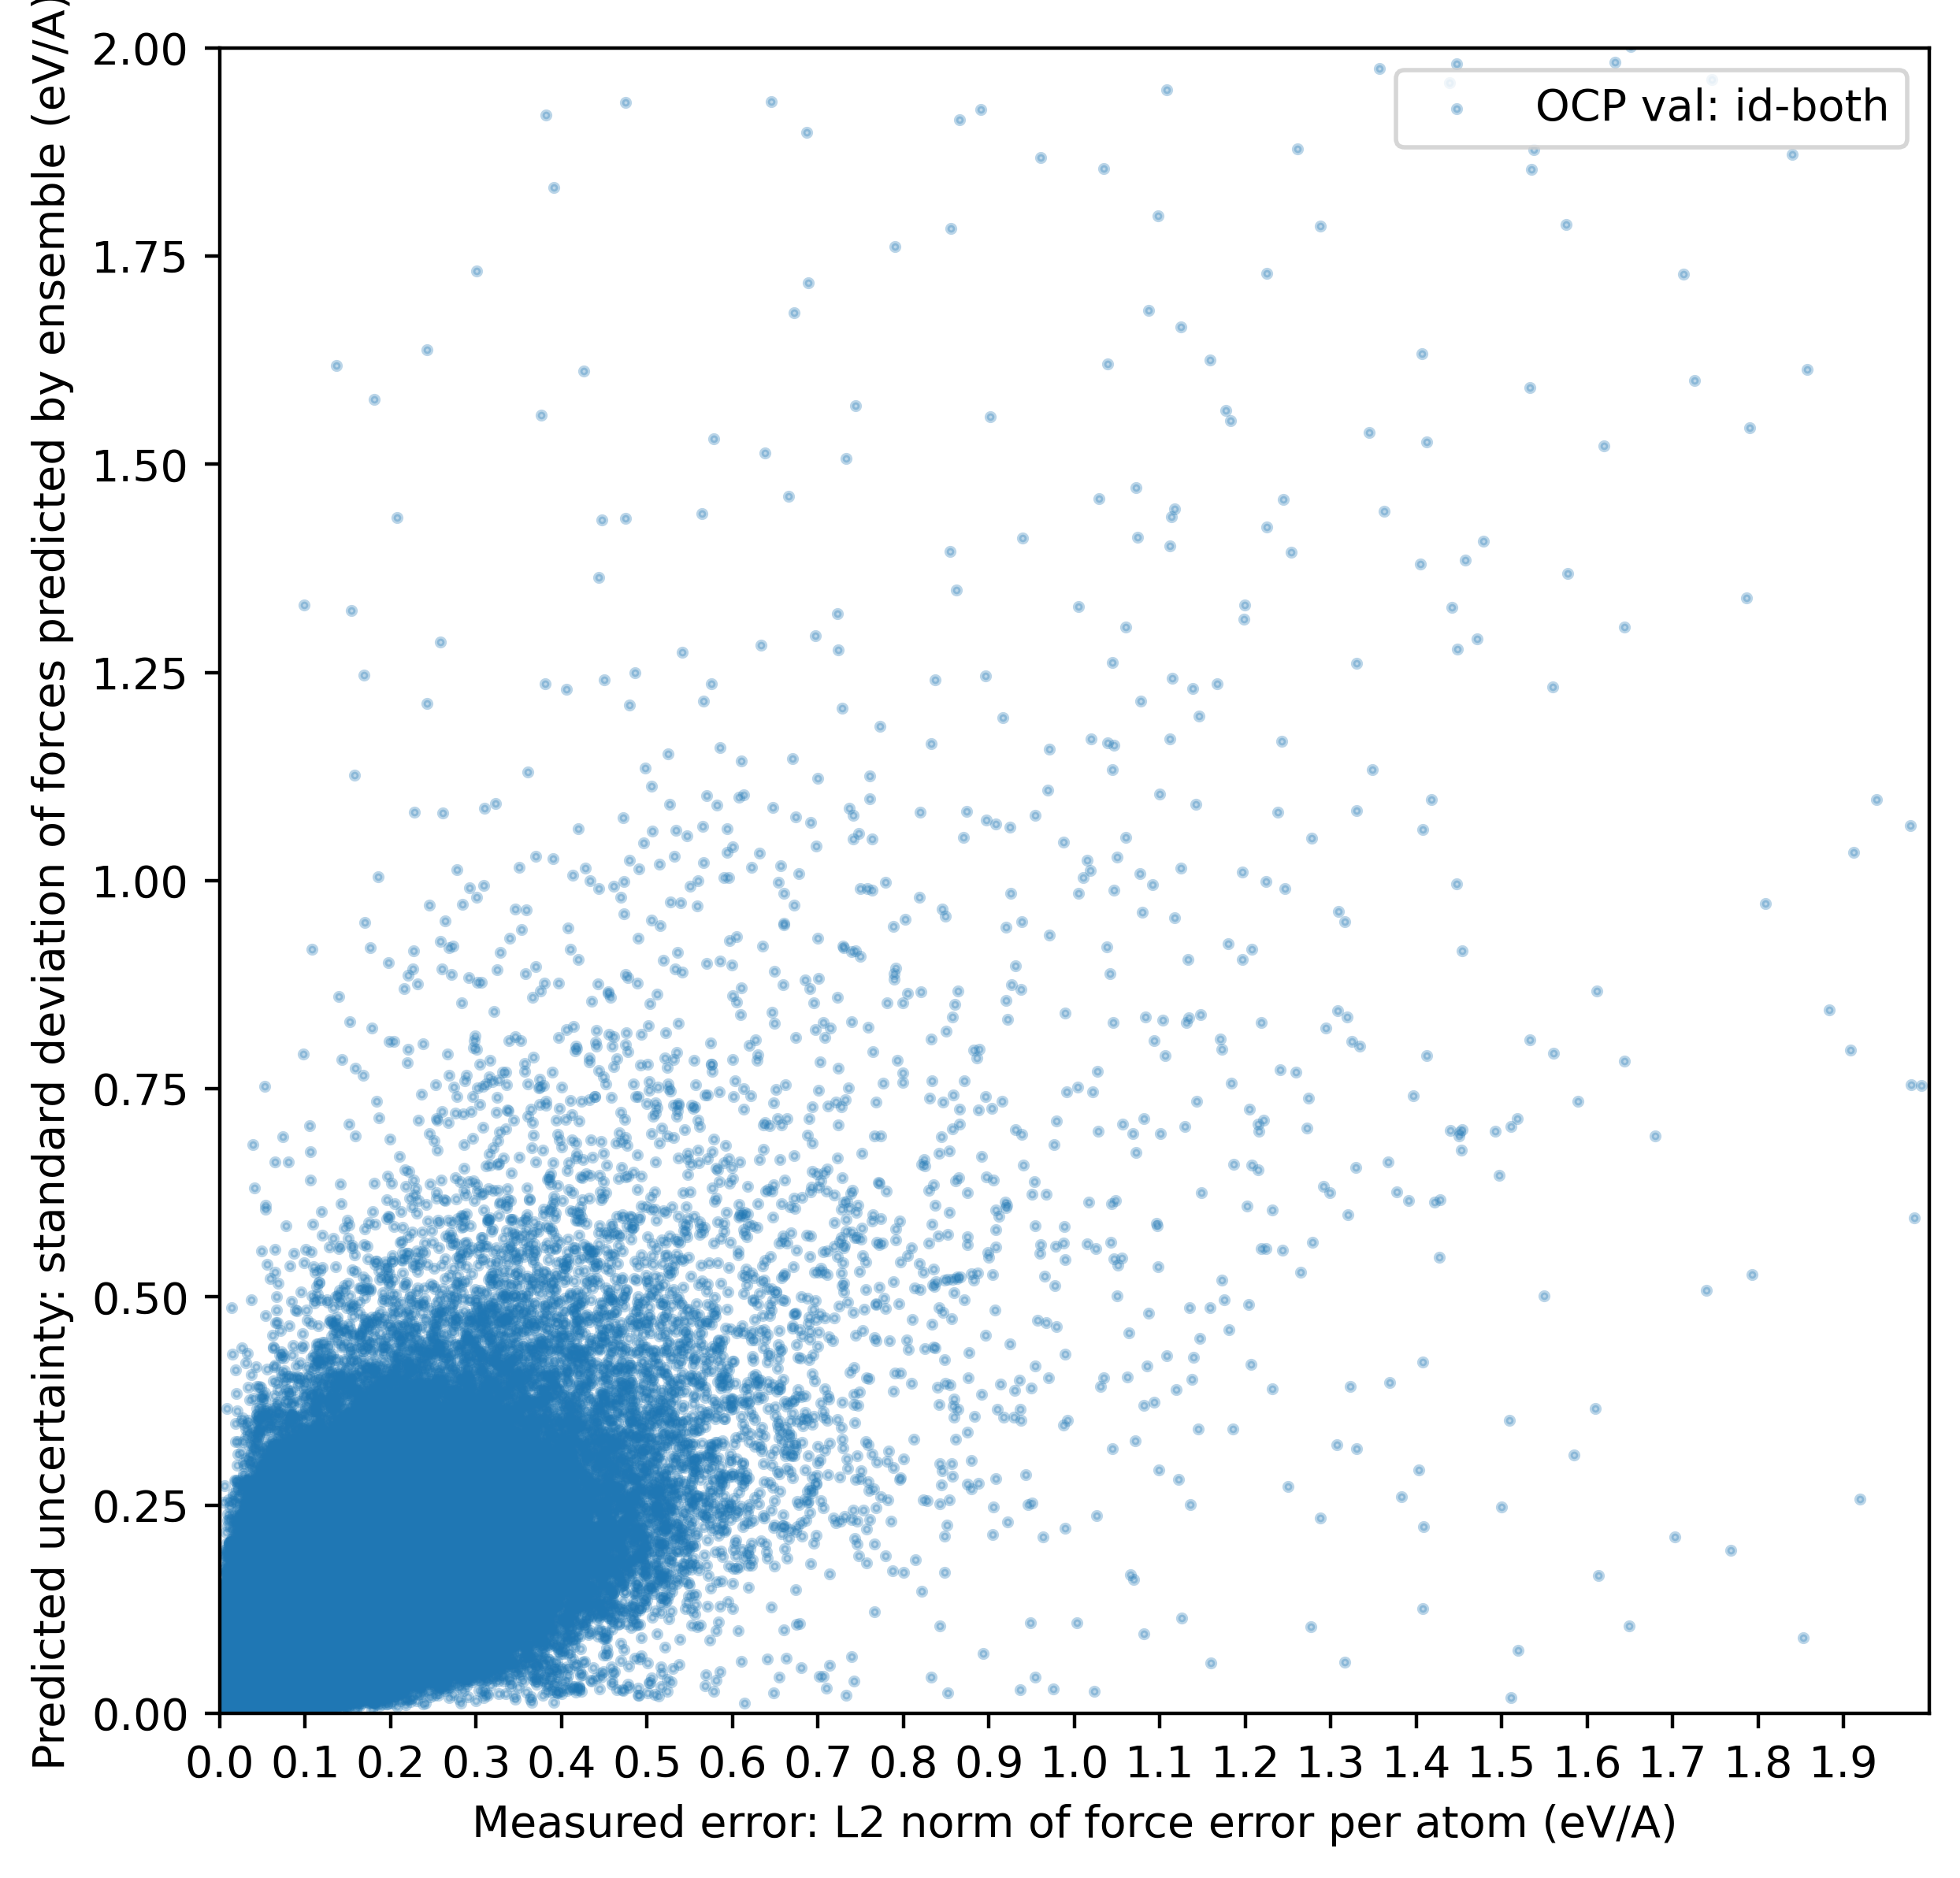

In [8]:
# calibrate the uncertainty
from scipy import optimize

def func(x, m):
    y = m*(x)
    return y

newx = []
newy = []
for i,j in zip(x,y):
    if i < 2:
        newx.append(i)
        newy.append(j)

alpha = optimize.curve_fit(func, xdata=newy, ydata=newx)[0]
ycal = [i*alpha[0] for i in y]
print(alpha)

plt.figure(figsize=(7, 7), dpi=400)

limits = (0, max(x + ycal))
limits = (0, 2)

plt.scatter(x, ycal, s=3, alpha=0.3, label="OCP val: id-both")
plt.xlim(limits)
plt.ylim(limits)
plt.xticks(np.arange(0, 2, step=0.1))
plt.xlabel("Measured error: L2 norm of force error per atom (eV/A)")
plt.ylabel("Predicted uncertainty: standard deviation of forces predicted by ensemble (eV/A)")
plt.legend()
